<a href="https://colab.research.google.com/github/DitaAnatasya/prakvisdat/blob/main/2008107010060_Dita_Anatasya_Tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TUGAS 3 PRAKTIKUM VISUALISASI DATA
NAMA : DITA ANATASYA
NPM  : 2008107010060


In [ ]:
#import library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#membaca file data
data = pd.read_csv('data.csv')

1. EDA

In [ ]:
data.head()

,Date,Product,SalesCount,VisitsCount
0,31.01.2020,Product A,135,2420
1,29.02.2020,Product A,153,2502
2,31.03.2020,Product A,162,1074
3,30.04.2020,Product A,162,0
4,31.05.2020,Product A,128,0


In [ ]:
data.shape

(115, 4)

In [ ]:
#cek typedata kolom
all(isinstance(column, str) for column in data.columns)

True

In [ ]:
data.rename(columns={'SalesCount':'Sales Count', 'VisitsCount':'Visits Count', 'Product':'Products'}, inplace=True)
data.head()

,Date,Products,Sales Count,Visits Count
0,31.01.2020,Product A,135,2420
1,29.02.2020,Product A,153,2502
2,31.03.2020,Product A,162,1074
3,30.04.2020,Product A,162,0
4,31.05.2020,Product A,128,0


In [ ]:
data.describe()

,Sales Count,Visits Count
count,115.000000,115.000000
mean,68519.069565,7567.886957
std,92801.885595,8466.343792
min,95.000000,0.000000
25%,787.500000,1966.000000
50%,31350.000000,3713.000000
75%,85517.500000,11357.000000
max,385528.000000,36734.000000


2. FILTERING

In [ ]:
data[(data['Products']=='Product A') & (data['Sales Count']==128)]

,Date,Products,Sales Count,Visits Count
4,31.05.2020,Product A,128,0


In [ ]:
dfilter = pd.DataFrame(data, columns=['Products', 'Visits Count'])
dfilter1 = dfilter.loc[(dfilter['Products'].notnull()) & (dfilter['Visits Count'] == 0)]
dfilter1

,Products,Visits Count
3,Product A,0
4,Product A,0
26,Product B,0
27,Product B,0
49,Product C,0
50,Product C,0
72,Product D,0
73,Product D,0
95,Product E,0
96,Product E,0


In [ ]:
dKolom = pd.DataFrame(data, columns=['Products', 'Visits Count', 'Sales Count'])
dfilter2 = dKolom.loc[(data['Visits Count'] != 0)]
dDuplicates = dfilter2.drop_duplicates(subset = 'Products')
dDuplicates

,Products,Visits Count,Sales Count
0,Product A,2420,135
23,Product B,279,105
46,Product C,15834,45963
69,Product D,23606,385528
92,Product E,4873,105540


In [ ]:
dKolom = pd.DataFrame(data, columns=['Products', 'Visits Count', 'Sales Count'])
dfilter2 = dKolom.loc[(data['Visits Count'] != 0)]
dDuplicates1 = dfilter2.drop_duplicates(subset = 'Products')
dDuplicates1

,Products,Visits Count,Sales Count
0,Product A,2420,135
23,Product B,279,105
46,Product C,15834,45963
69,Product D,23606,385528
92,Product E,4873,105540


In [ ]:
#mengubah index data
dDuplicates .set_index('Products', inplace=True)
dDuplicates .head()

,Visits Count,Sales Count
Products,,
Product A,2420,135
Product B,279,105
Product C,15834,45963
Product D,23606,385528
Product E,4873,105540


In [ ]:
# add total column
dDuplicates ['Total'] = dDuplicates .sum(axis=1)
dDuplicates


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Visits Count,Sales Count,Total
Products,,,
Product A,2420,135,2555
Product B,279,105,384
Product C,15834,45963,61797
Product D,23606,385528,409134
Product E,4873,105540,110413


In [ ]:
#group by
data_count = data.groupby('Products', axis=0).sum()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(data.groupby('Products', axis=0)))

data_count.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Sales Count,Visits Count
Products,,
Product A,8273,51350
Product B,31051,47087
Product C,778438,295565
Product D,5296319,388352
Product E,1765612,87953


3. PIE CHART

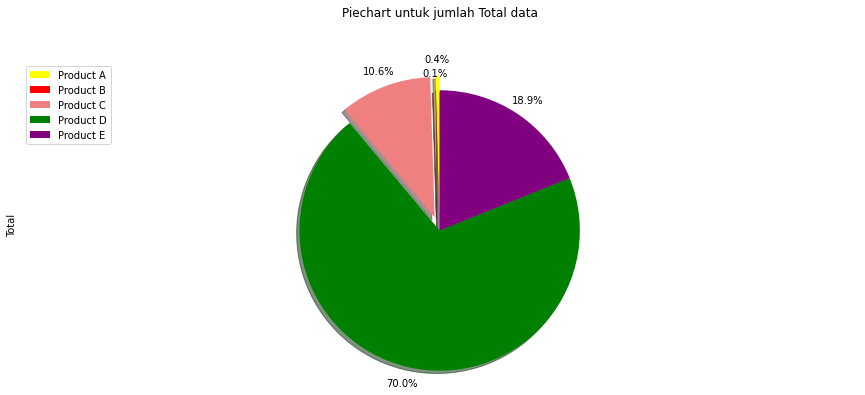

In [ ]:
colors_list = ['yellow', 'red', 'lightcoral', 'green', 'purple']
explode_list = [0.1, 0, 0.1, 0, 0]
dDuplicates['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,
                            explode=explode_list# add custom colors)
)


# scale the title up by 12% to match pctdistance
plt.title("Piechart untuk jumlah Total data", y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=dDuplicates.index, loc='upper left')

plt.show()

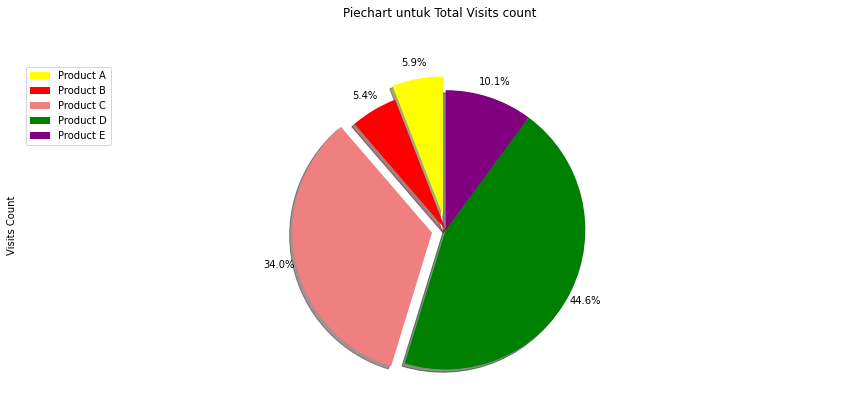

In [ ]:
colors_list = ['yellow', 'red', 'lightcoral', 'green', 'purple']
explode_list = [0.1, 0, 0.1, 0, 0]
data_count['Visits Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,
                            explode=explode_list# add custom colors)
)


# scale the title up by 12% to match pctdistance
plt.title("Piechart untuk Total Visits count", y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=dDuplicates.index, loc='upper left')

plt.show()

4. BOXPLOT

In [ ]:
datacount = dDuplicates.loc[['Product A', 'Product B']].transpose()
datacount

Products,Product A,Product B
Visits Count,2420,279
Sales Count,135,105
Total,2555,384


In [ ]:
datacount.describe()

Products,Product A,Product B
count,3.000000,3.000000
mean,1703.333333,256.000000
std,1359.892765,140.914868
min,135.000000,105.000000
25%,1277.500000,192.000000
50%,2420.000000,279.000000
75%,2487.500000,331.500000
max,2555.000000,384.000000


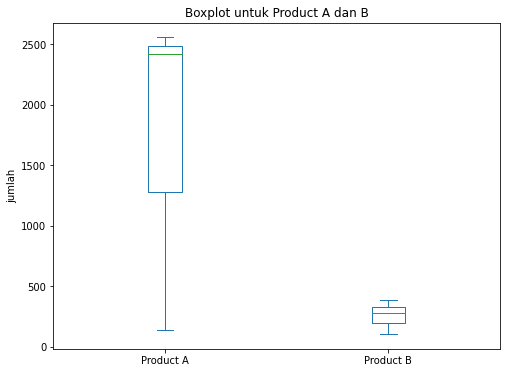

In [ ]:
datacount.plot(kind='box', figsize=(8, 6))

plt.title("Boxplot untuk Product A dan B")
plt.ylabel("jumlah")

plt.show()

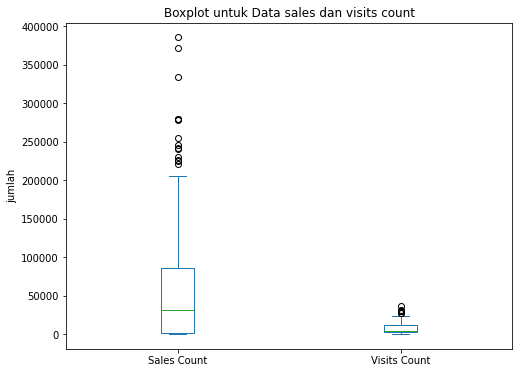

In [ ]:
data.plot(kind='box', figsize=(8, 6))

plt.title("Boxplot untuk Data sales dan visits count")
plt.ylabel("jumlah")

plt.show()

5. SCATTER PLOT



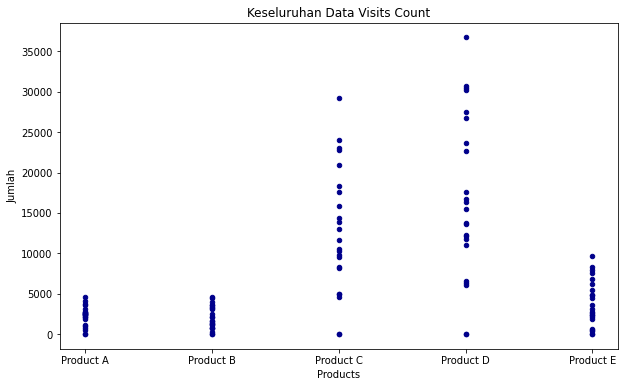

In [ ]:

data.plot(kind='scatter', x='Products', y='Visits Count', figsize=(10, 6), color='darkblue')

plt.title('Keseluruhan Data Visits Count')
plt.xlabel('Products')
plt.ylabel('Jumlah')

plt.show()

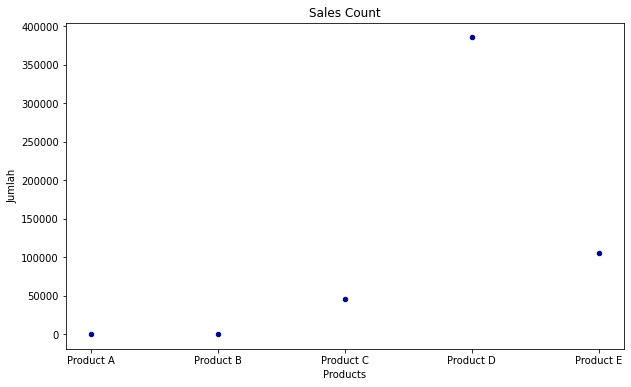

In [ ]:
dDuplicates1.plot(kind='scatter', x='Products', y='Sales Count', figsize=(10, 6), color='darkblue')

plt.title('Sales Count')
plt.xlabel('Products')
plt.ylabel('Jumlah')

plt.show()